LOADING IN DATASETS


In [13]:
import pandas as pd
#Loading all try datasets
df1 = pd.read_csv(r'world-happiness-report-2021.csv')
df2 = pd.read_csv('population_by_country_2020.csv')
df3= pd.read_csv(r'covid-19-country-statistics-dataset.csv')

#Printing them out to have a small overview
print(df1.head(10))
print(df2.head(10))
print(df3.head(10))
#print(df1['bikeid','gender'])   #error not correct form
#print(df1[['bikeid', 'gender']])
# (Select and save specific colomns that I wish to work with)




  Country name     Regional indicator  Ladder score  \
0      Finland         Western Europe         7.842   
1      Denmark         Western Europe         7.620   
2  Switzerland         Western Europe         7.571   
3      Iceland         Western Europe         7.554   
4  Netherlands         Western Europe         7.464   
5       Norway         Western Europe         7.392   
6       Sweden         Western Europe         7.363   
7   Luxembourg         Western Europe         7.324   
8  New Zealand  North America and ANZ         7.277   
9      Austria         Western Europe         7.268   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   
5   

SELECTING SPECFIC COLOMNS NECESSARY
used the iloc method instead of the (selected_cols = df[['col1', 'col2']]) much easier to type out without specifc colomn names.

In [14]:
# selected the colomns that I wanted to use
df1sel= df1.iloc[:, [0,1,2,6,8]]
df2sel= df2.iloc[:, [0,1,2,8,10]]
df3sel= df3.iloc[:, [1,2,4,13,14]]

# Printed for a small over view
print(df1sel)
print(df2sel)
print(df3sel)

    Country name  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     Healthy life expectancy  
0                     72.000  
1            

CHECK COLUMNS FOR SIMILAR NAMES TO DO A MERGE

In [15]:
# To veiw all colomns neads so I can have the name on which I might do a merge.
print(df1sel.columns)
print(df2sel.columns)
print(df3sel.columns)

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Healthy life expectancy'],
      dtype='object')
Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Med. Age', 'World Share'],
      dtype='object')
Index(['Country', 'Total Cases', 'Total Deaths', 'Population', 'Continent'], dtype='object')


RENAMING MY COLOMNS TO MATCH EACH OTHER FOR A MERGE

In [16]:
newdf1 = df1sel.rename(columns={'Country name':'Country','Regional indicator':'Continent'})
newdf2 = df2sel.rename(columns={'Country (or dependency)':'Country'})
newdf3 = df3sel
print(newdf1.columns)
print(newdf2.columns)
print(newdf3.columns)

Index(['Country', 'Continent', 'Ladder score', 'Logged GDP per capita',
       'Healthy life expectancy'],
      dtype='object')
Index(['Country', 'Population (2020)', 'Yearly Change', 'Med. Age',
       'World Share'],
      dtype='object')
Index(['Country', 'Total Cases', 'Total Deaths', 'Population', 'Continent'], dtype='object')


Checking the count of unique values and null values in order to get an overview of colomn I plan to join / merge my 3 different data sets.

In [17]:
''''country1_counts = newdf1['Country'].value_counts()
country2_counts = newdf2['Country'].value_counts()
country3_counts = newdf3['Country'].value_counts()
print(country1_counts)
print(country2_counts)
print(country3_counts)'''
print(newdf1['Country'].nunique())
print(newdf2['Country'].nunique())
print(newdf3['Country'].nunique())

print(newdf1['Country'].isnull().sum())
print(newdf2['Country'].isnull().sum())
print(newdf3['Country'].isnull().sum())

149
235
217
0
0
0


ATTEMPTING TO FINALLY MERGE ALL DATASETS

In [18]:
mergedf = pd.merge(newdf1, newdf2, on = 'Country')
finaldf = pd.merge(mergedf, newdf3, on ='Country')
#[133 rows x 13 columns]
print(finaldf.head)
#print(mergedf.head)

#concatenated_df = pd.concat([newdf1, newdf2, newdf3])
#print(concatenated_df)
#[601 rows x 13 columns]

<bound method NDFrame.head of          Country         Continent_x  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
129       Malawi  Sub-Saharan Africa         3.600                  6.958   
130      Lesotho  Sub-Saharan Africa         3.512                  7.926   
131       Rwanda  Sub-Saharan Africa         3.415                  7.676   
132     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
133  Afghanistan          South Asia         2.523                  7.695   

     Healthy life expectancy  Population (202

Gather information on colomns to Scan the types and count

In [19]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  134 non-null    object 
 1   Continent_x              134 non-null    object 
 2   Ladder score             134 non-null    float64
 3   Logged GDP per capita    134 non-null    float64
 4   Healthy life expectancy  134 non-null    float64
 5   Population (2020)        134 non-null    int64  
 6   Yearly Change            134 non-null    object 
 7   Med. Age                 134 non-null    object 
 8   World Share              134 non-null    object 
 9   Total Cases              134 non-null    object 
 10  Total Deaths             134 non-null    object 
 11  Population               134 non-null    object 
 12  Continent_y              134 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 14.7+ KB


IMPORT the plotting packages to visual data extracts

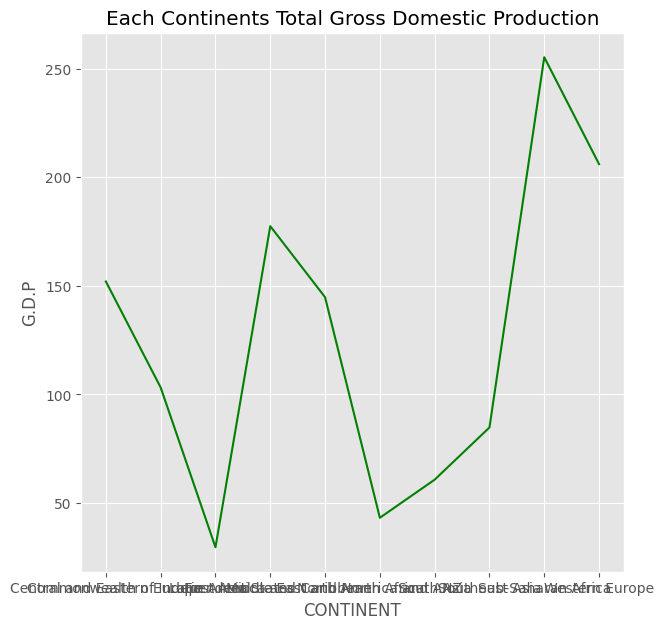

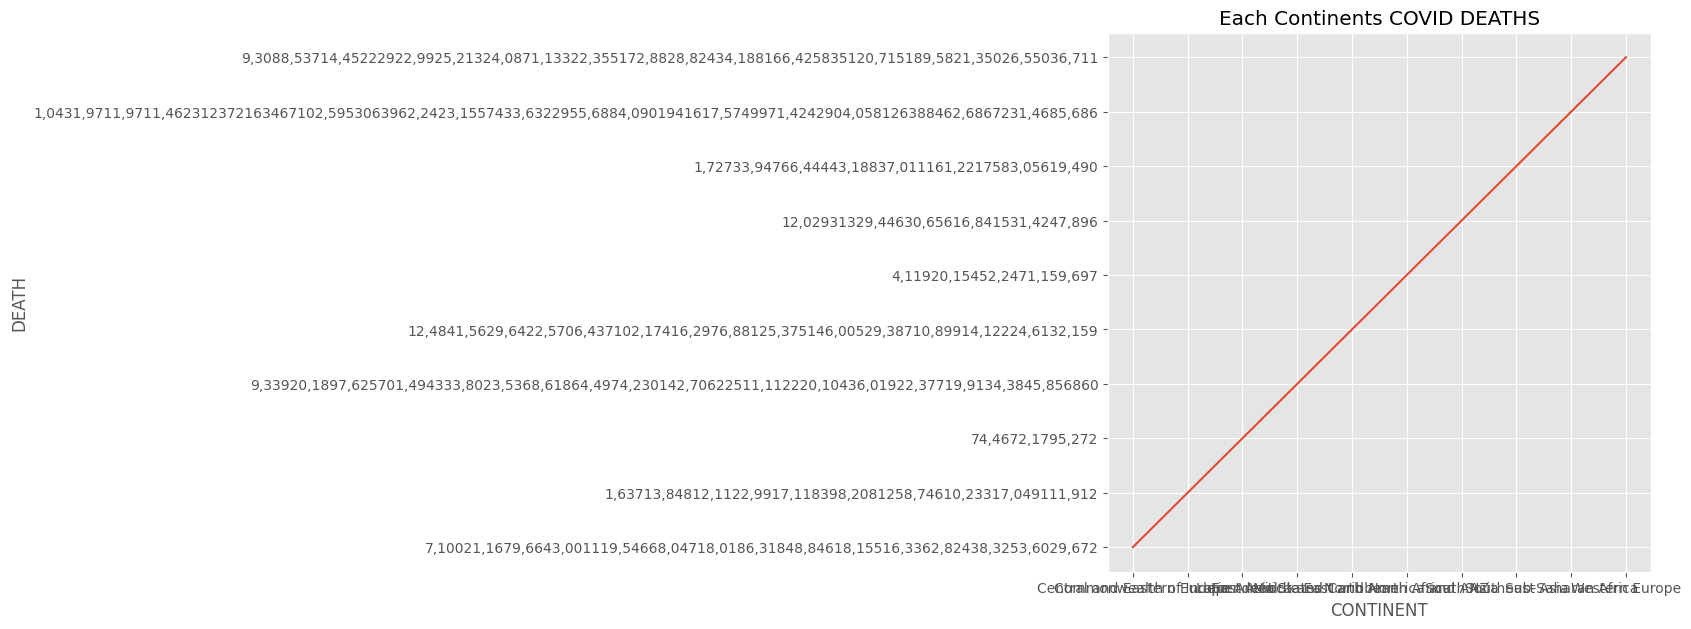

In [31]:
import matplotlib.pyplot as plt
group = finaldf.groupby('Continent_x')['Logged GDP per capita'].sum().reset_index()
plt.figure(figsize=(7, 7))
plt.plot(group['Continent_x'], group['Logged GDP per capita'], color='green')
plt.xlabel('CONTINENT')
plt.ylabel('G.D.P')
plt.title("Each Continents Total Gross Domestic Production")
plt.style.use('ggplot')
#print(group)
plt.show()

group1 = finaldf.groupby('Continent_x')['Total Deaths'].sum().reset_index()
plt.figure(figsize=(7, 7))
plt.ticklabel_format(style='plain')
plt.xlabel('CONTINENT')
plt.ylabel('DEATH')
plt.title("Each Continents COVID DEATHS")
plt.plot(group1['Continent_x'], group1['Total Deaths'])



Double checking the colomns to see what types are my data. Realising that types that should be intergers and numbers are preloaded as type object, which is why charts axis are incorrect.

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  134 non-null    object 
 1   Regional indicator       134 non-null    object 
 2   Ladder score             134 non-null    float64
 3   Logged GDP per capita    134 non-null    float64
 4   Healthy life expectancy  134 non-null    float64
 5   Population (2020)        134 non-null    int64  
 6   Yearly Change            134 non-null    object 
 7   Med. Age                 134 non-null    object 
 8   World Share              134 non-null    object 
 9   Total Cases              134 non-null    object 
 10  Total Deaths             134 non-null    object 
 11  Population               134 non-null    object 
 12  Continent                134 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 14.7+ KB


Changing neccesary data type to interger.

In [ ]:
finaldf['Total Deaths'] = finaldf['Total Deaths'].str.replace(',', '').astype('int64')
finaldf['Total Cases'] = finaldf['Total Cases'].str.replace(',', '').astype('int64')
finaldf['Med. Age'] = finaldf['Med. Age'].str.replace(',', '').astype('int64')
finaldf['Population'] = finaldf['Population'].str.replace(',', '').astype('int64')
assert finaldf['Population'].dtype == 'int64'
#Med. Age         
# World Share 
# Total Cases 
# Total Deaths
# Population  

Check my columns and rows again for any inconsistencies with how the entries are down, then lock in on those colomns in order to properly format them.

In [ ]:
print(finaldf)

#Specify the coloms for format
print(finaldf.iloc[:, [6,8]])


#df3sel= df3.iloc[:, [1,2,4,13,14]]

         Country  Regional indicator  Ladder score  Logged GDP per capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
129       Malawi  Sub-Saharan Africa         3.600                  6.958   
130      Lesotho  Sub-Saharan Africa         3.512                  7.926   
131       Rwanda  Sub-Saharan Africa         3.415                  7.676   
132     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
133  Afghanistan          South Asia         2.523                  7.695   

     Healthy life expectancy  Population (2020) Yearly Change  Med. Age  \


Also have to make sure I get rid of any special charcters that come along with my data

In [ ]:
finaldf['World Share'] = finaldf['World Share'].str.rstrip(' %')
finaldf['Yearly Change'] = finaldf['Yearly Change'].str.rstrip(' %')
finaldf= finaldf.rename(columns={'World Share':'World Share(%)'})
finaldf= finaldf.rename(columns={'Yearly Change':'Annual Change(%)'})
print(finaldf.iloc[:, [6,8]])

    Annual Change(%) World Share(%)
0               0.15           0.07
1               0.35           0.07
2               0.74           0.11
3               0.65           0.00
4               0.22           0.22
..               ...            ...
129             2.69           0.25
130             0.80           0.03
131             2.58           0.17
132             1.48           0.19
133             2.33           0.50

[134 rows x 2 columns]


Check data types to see if everything was adjusted accordingly

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  134 non-null    object 
 1   Regional indicator       134 non-null    object 
 2   Ladder score             134 non-null    float64
 3   Logged GDP per capita    134 non-null    float64
 4   Healthy life expectancy  134 non-null    float64
 5   Population (2020)        134 non-null    int64  
 6   Annual Change(%)         134 non-null    object 
 7   Med. Age                 134 non-null    int64  
 8   World Share(%)           134 non-null    object 
 9   Total Cases              134 non-null    int64  
 10  Total Deaths             134 non-null    int64  
 11  Population               134 non-null    int64  
 12  Continent                134 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 14.7+ KB


Visualization Attempts, with matplot

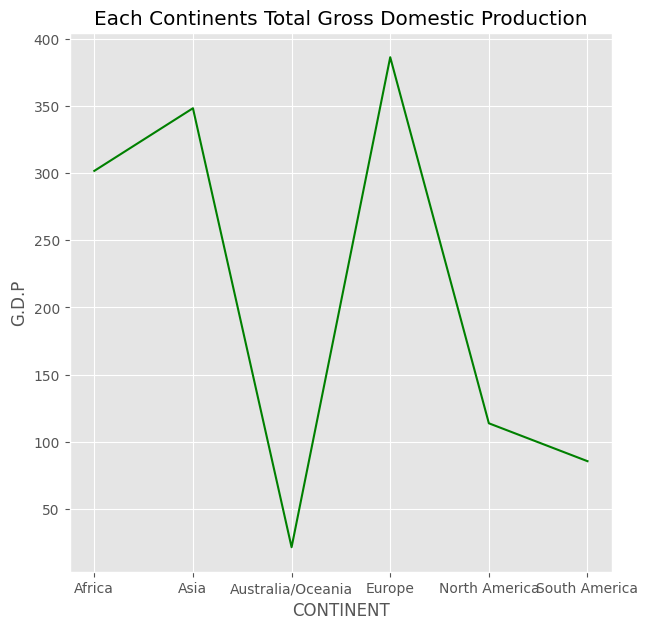

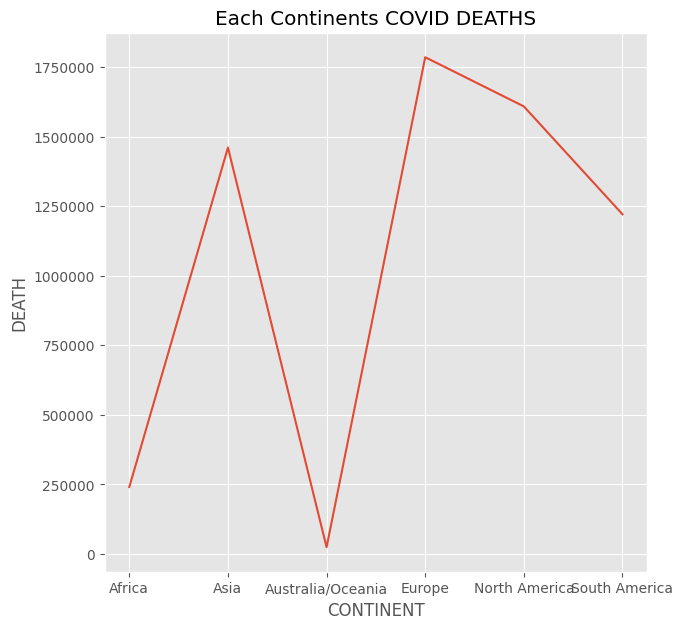

In [ ]:
import matplotlib.pyplot as plt
#colors = ['black','blue', 'green', 'red', 'orange', 'yellow']
group = finaldf.groupby('Continent')['Logged GDP per capita'].sum().reset_index()
plt.figure(figsize=(7, 7))
#plt.bar(group['Continent'], group['Logged GDP per capita'], color=colors)
plt.plot(group['Continent'], group['Logged GDP per capita'], color='green')
plt.xlabel('CONTINENT')
plt.ylabel('G.D.P')
plt.title("Each Continents Total Gross Domestic Production")
plt.style.use('ggplot')
#print(group)
plt.show()

group1 = finaldf.groupby('Continent')['Total Deaths'].sum().reset_index()
plt.figure(figsize=(7, 7))
plt.ticklabel_format(style='plain')
plt.xlabel('CONTINENT')
plt.ylabel('DEATH')
plt.title("Each Continents COVID DEATHS")
plt.plot(group1['Continent'], group1['Total Deaths'])
#print(group1)

Here I can see why my results are not in similarity with general Knowlege of gLobal GDP. Below will check for any inconsistencies with data

In [ ]:
# Check for inconsistencies within my key Joining colomns
inconsistent_cat1 = set(df1sel['Country name']).difference(df2sel['Country (or dependency)'])
inconsistent_cat2 = set(df2sel['Country (or dependency)']).difference(df1sel['Country name'])
inconsistent_cat3 = set(df1sel['Country name']).difference(df3sel['Country'])
inconsistent_cat4 = set(df3sel['Country']).difference(df1sel['Country name'])
inconsistent_cat5 = set(df2sel['Country (or dependency)']).difference(df3sel['Country'])
inconsistent_cat6 = set(df3sel['Country']).difference(df2sel['Country (or dependency)'])


print(inconsistent_cat1)
print(inconsistent_cat2)
print(inconsistent_cat3)
print(inconsistent_cat4)
print(inconsistent_cat5)
print(inconsistent_cat6)


# Getting the entire row of data
#intconsistent_rows = df1sel['Country name'].isin(inconsistent_cat)
#print(df1sel[intconsistent_rows])

{'Kosovo', 'Congo (Brazzaville)', 'North Cyprus', 'Czech Republic', 'Ivory Coast', 'Palestinian Territories', 'Swaziland', 'Hong Kong S.A.R. of China', 'Taiwan Province of China'}
{'American Samoa', 'Greenland', 'Macao', 'Sudan', 'Central African Republic', 'Isle of Man', 'Eritrea', 'Marshall Islands', 'Micronesia', 'Nauru', 'Guadeloupe', 'Guam', 'Western Sahara', 'Aruba', 'New Caledonia', 'Gibraltar', 'Niue', 'Martinique', 'Saint Martin', 'Brunei', 'Montserrat', 'Angola', 'Puerto Rico', 'Congo', 'Belize', 'Timor-Leste', 'Bermuda', 'South Sudan', 'Saint Kitts & Nevis', 'Barbados', 'Curaçao', 'Channel Islands', 'Liechtenstein', 'Saint Helena', 'Northern Mariana Islands', 'Somalia', 'Cuba', 'North Korea', 'Equatorial Guinea', 'Andorra', 'Grenada', 'Holy See', 'Djibouti', 'Seychelles', 'Guinea-Bissau', 'State of Palestine', 'Bhutan', 'Monaco', 'French Polynesia', 'Czech Republic (Czechia)', 'Samoa', 'Cayman Islands', 'Palau', 'Turks and Caicos', 'Guyana', 'San Marino', 'Solomon Islands', 

Convert these inconsistences to Dataframes in order to join/ merge them tohether.

In [ ]:
list1 = list(inconsistent_cat1)
list2 = list(inconsistent_cat2)
list3 = list(inconsistent_cat3)
list4 = list(inconsistent_cat4)
list5 = list(inconsistent_cat5)
list6 = list(inconsistent_cat6)
combined_list = list1 +  list2 +  list3 +  list4 +  list5 + list6 
df_incon = pd.DataFrame({'Country': combined_list})
print(df_incon)

                   Country
0                   Kosovo
1      Congo (Brazzaville)
2             North Cyprus
3           Czech Republic
4              Ivory Coast
..                     ...
239  Sao Tome and Principe
240      Wallis and Futuna
241  Saint Pierre Miquelon
242               S. Korea
243                     UK

[244 rows x 1 columns]


In [ ]:
# concatenated_df = pd.concat([df1, df2, df3])
# print(concatenated_df.head())
# concatenated_df.info()
# concatenated_df.describe()


country_continent_dict = newdf1.set_index('Country')['Continent'].to_dict()
print(country_continent_dict)


{'Finland': 'Western Europe', 'Denmark': 'Western Europe', 'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Netherlands': 'Western Europe', 'Norway': 'Western Europe', 'Sweden': 'Western Europe', 'Luxembourg': 'Western Europe', 'New Zealand': 'North America and ANZ', 'Austria': 'Western Europe', 'Australia': 'North America and ANZ', 'Israel': 'Middle East and North Africa', 'Germany': 'Western Europe', 'Canada': 'North America and ANZ', 'Ireland': 'Western Europe', 'Costa Rica': 'Latin America and Caribbean', 'United Kingdom': 'Western Europe', 'Czech Republic': 'Central and Eastern Europe', 'United States': 'North America and ANZ', 'Belgium': 'Western Europe', 'France': 'Western Europe', 'Bahrain': 'Middle East and North Africa', 'Malta': 'Western Europe', 'Taiwan Province of China': 'East Asia', 'United Arab Emirates': 'Middle East and North Africa', 'Saudi Arabia': 'Middle East and North Africa', 'Spain': 'Western Europe', 'Italy': 'Western Europe', 'Slovenia': 'Centra

FINDING THE TOP 10 VS BOTTOM 10 LIFE EXPECTANCIES 

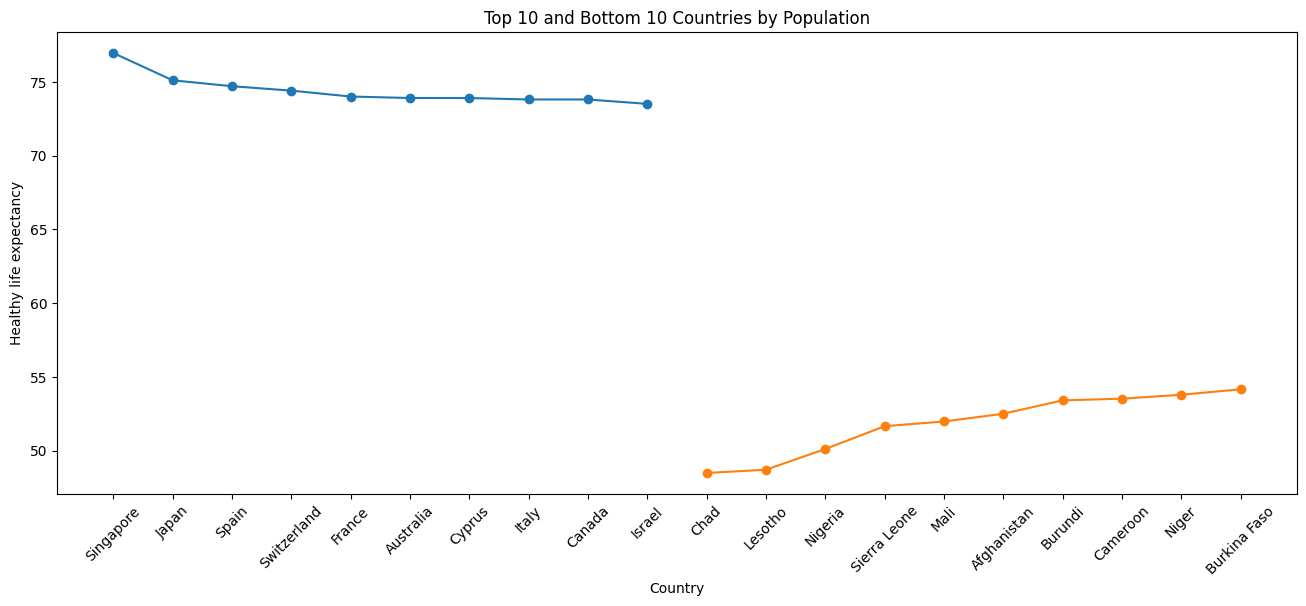

In [27]:
import matplotlib.pyplot as plt

# sorting by expectancy in descedning order
sort = finaldf.sort_values(by = 'Healthy life expectancy', ascending=False)
sort1 = finaldf.sort_values(by = 'Healthy life expectancy', ascending=True)
# Selecting only top 10
top_10 = sort.head(10)
bottom_10 = sort1.head(10)
fig, ax = plt.subplots(figsize=(16, 6))
# fig, ax = plt.subplots()

ax.plot(bottom_10['Country'], bottom_10['Healthy life expectancy'], label='Bottom 10', marker='o')
ax.set_xlabel('Country')
ax.set_ylabel('Healthy life expectancy')
ax.set_title('Top 10 vs Bottom 10 Countries')
plt.xticks(rotation=45)

plt.show()



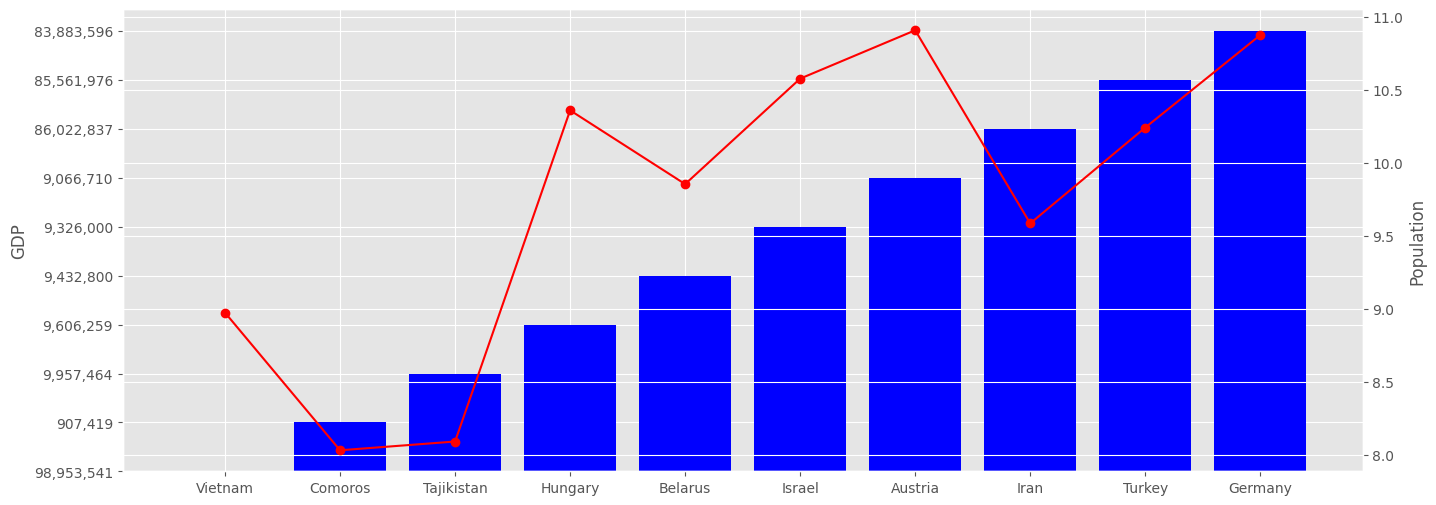

In [41]:
import matplotlib.pyplot as plt

# sorting by expectancy in descedning order
sort = finaldf.sort_values(by = 'Population', ascending=False)
sort1 = finaldf.sort_values(by = 'Population', ascending=True)
# Selecting only top 10
import matplotlib.pyplot as plt

# Sorting by population in descending order


# Selecting only top 10
top_10 = sort.head(10)

fig, ax1 = plt.subplots(figsize=(16, 6))

# Plotting GDP values
ax1.bar(top_10['Country'], top_10['Population'], color='blue')
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()

# Plotting population values
ax2.plot(top_10['Country'], top_10['Logged GDP per capita'], color='red', marker='o')
ax2.set_ylabel('Population')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()